In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
import os.path
from pathlib import Path
import glob

In [3]:
df = pd.read_csv('../data/gz2_hart16.csv')

In [4]:
df.head()

,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


In [4]:
m = pd.read_csv('../images_gz2/gz2_filename_mapping.csv')

In [6]:
m.head()

,objid,sample,asset_id
0,587722981736120347,original,1
1,587722981736579107,original,2
2,587722981741363294,original,3
3,587722981741363323,original,4
4,587722981741559888,original,5


In [30]:
df.gz2_class.unique()

array(['Sc+t', 'Sb+t', 'Ei', 'Er', 'Sb?t', 'Sb1m(i)', 'Sb2t', 'SBb2m',
       'SBc3m', 'Sc2t', 'Sb(d)', 'Sb3t', 'Ec', 'Sb3m', 'Er(o)', 'SBc(r)',
       'Sb', 'Ei(r)', 'Ser', 'Ei(m)', 'SBb+t', 'Sc2m', 'Sb?t(r)',
       'Sb1m(d)', 'Sc3t', 'SBb?t(m)', 'Sc(u)', 'Ser(u)', 'SBc2m',
       'Ser(m)', 'SBb2t', 'Sc?t(r)', 'Sb?t(d)', 'Sb?m(r)', 'Sb?m',
       'Ei(o)', 'SBb4t', 'Ser(o)', 'SBb?t', 'SBc2t', 'SBb2l(i)',
       'Sb?t(i)', 'Sb(r)', 'Sb2l(m)', 'SBb2m(r)', 'Sc4m(m)', 'SBc2l',
       'Sc?t', 'SBb(r)', 'Sb1m(r)', 'Sc4t', 'Sc3m', 'Sc4m', 'Sb1m(m)',
       'SBc4t', 'Sb1m', 'Sa2l(m)', 'SBc?t', 'Sb1t(r)', 'Er(m)', 'Sc?t(m)',
       'SBb', 'Sc(o)', 'SBb3t', 'SBb3t(m)', 'Sb1t(d)', 'SBb2l',
       'SBb2l(m)', 'Ei(d)', 'Sb2l(r)', 'Sc2m(r)', 'Sc+m', 'Ei(i)',
       'Sc2m(d)', 'Er(l)', 'SBb3m', 'Sb4t', 'Sb2l', 'Sb1t', 'Sb3m(r)',
       'SBb2l(r)', 'Sb3m(m)', 'Sb?m(i)', 'Sb1l(m)', 'Sb+m', 'SBa(o)',
       'Sb2m', 'Ser(d)', 'Sc(r)', 'Sb?m(m)', 'SBc4m', 'Sb2m(r)', 'Er(r)',
       'Sb?l(i)', 'SBc3t', 'S

In [12]:
len(df.gz2_class.unique())

818

In [5]:
df.rename(columns={"dr7objid":"objid"}, inplace=True)

In [6]:
df = pd.merge(df,m, on = 'objid', how='left')

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
df.head()

,objid,ra,dec,rastring,decstring,sample_x,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a01_smooth_flag,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a02_features_or_disk_flag,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_debiased,t01_smooth_or_features_a03_star_or_artifact_flag,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_fraction,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a04_yes_debiased,t02_edgeon_a04_yes_flag,t02_edgeon_a05_no_count,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_fraction,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_a05_no_debiased,t02_edgeon_a05_no_flag,t03_bar_a06_bar_count,t03_bar_a06_bar_weight,t03_bar_a06_bar_fraction,t03_bar_a06_bar_weighted_fraction,t03_bar_a06_bar_debiased,t03_bar_a06_bar_flag,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_fraction,t03_bar_a07_no_bar_weighted_fraction,t03_bar_a07_no_bar_debiased,t03_bar_a07_no_bar_flag,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_fraction,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a08_spiral_debiased,t04_spiral_a08_spiral_flag,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_fraction,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_a09_no_spiral_debiased,t04_spiral_a09_no_spiral_flag,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a10_no_bulge_debiased,t05_bulge_prominence_a10_no_bulge_flag,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_debiased,t05_bulge_prominence_a11_just_noticeable_flag,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_fraction,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a12_obvious_debiased,t05_bulge_prominence_a12_obvious_flag,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_fraction,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_a13_dominant_debiased,t05_bulge_prominence_a13_dominant_flag,t06_odd_a14_yes_count,t06_odd_a14_yes_weight,t06_odd_a14_yes_fraction,t06_odd_a14_yes_weighted_fraction,t06_odd_a14_yes_debiased,t06_odd_a14_yes_flag,t06_odd_a15_no_count,t06_odd_a15_no_weight,t06_odd_a15_no_fraction,t06_odd_a15_no_weighted_fraction,t06_odd_a15_no_debiased,t06_odd_a15_no_flag,t07_rounded_a16_completely_round_count,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_fraction,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a16_completely_round_debiased,t07_rounded_a16_completely_round_flag,t07_rounded_a17_in_between_count,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_fraction,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a17_in_between_debiased,t07_rounded_a17_in_between_flag,t07_rounded_a18_cigar_shaped_count,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_fraction,t07_rounded_a18_cigar_shaped_weighted_fract

In [7]:
df.dropna(inplace=True)

In [8]:
df.set_index('asset_id', inplace=True)

In [9]:
df.shape

(239389, 232)

In [101]:
elip = df[df.t01_smooth_or_features_a01_smooth_weighted_fraction>0.80]

In [102]:
elip.shape

(107091, 233)

In [72]:
disk = df[df.t01_smooth_or_features_a02_features_or_disk_fraction>0.80]

In [73]:
disk.shape

(27828, 233)

In [108]:
disk.t01_smooth_or_features_a02_features_or_disk_flag.sum()

27708

In [74]:
star = df[df.t01_smooth_or_features_a03_star_or_artifact_fraction>0.80]

In [75]:
star.shape

(35, 233)

In [96]:
edge_on = df[df.t02_edgeon_a04_yes_fraction>0.80]

In [106]:
edge_on.t02_edgeon_a04_yes_flag.sum()

18018

In [98]:
edge_on.shape

(20035, 233)

In [99]:
not_edge_on = df[df.t02_edgeon_a05_no_fraction>0.80]

In [100]:
edge_on.shape

(20035, 233)

In [80]:
bar = df[df.t03_bar_a06_bar_fraction>0.80]

In [81]:
bar.shape

(10334, 233)

In [82]:
no_bar = df[df.t03_bar_a07_no_bar_fraction>0.80]

In [83]:
no_bar.shape

(160689, 233)

In [84]:
spiral = df[df.t04_spiral_a08_spiral_fraction>0.80]

In [86]:
spiral.shape

(39038, 233)

In [88]:
no_spiral = df[df.t04_spiral_a09_no_spiral_fraction>0.80]

In [89]:
no_spiral.shape

(109324, 233)

In [10]:
df_flagged = df.filter(like='flag',axis=1)

<AxesSubplot:>

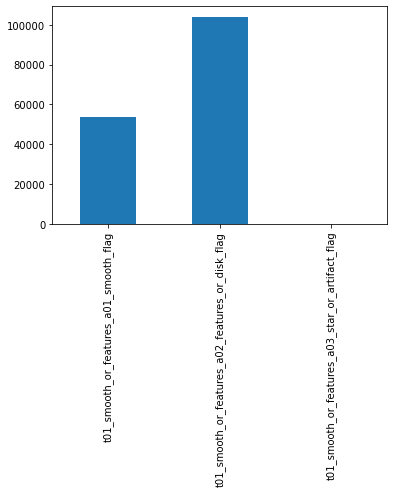

In [11]:
df_flagged.sum()[['t01_smooth_or_features_a01_smooth_flag','t01_smooth_or_features_a02_features_or_disk_flag','t01_smooth_or_features_a03_star_or_artifact_flag']].plot(kind='bar')

<AxesSubplot:>

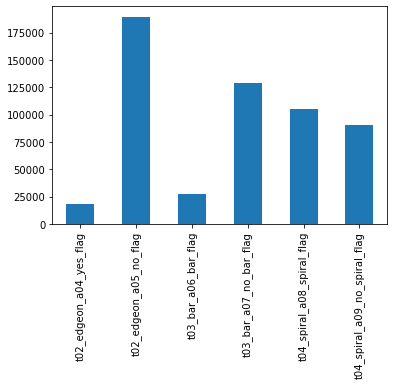

In [12]:
df_flagged.sum()[['t02_edgeon_a04_yes_flag','t02_edgeon_a05_no_flag','t03_bar_a06_bar_flag','t03_bar_a07_no_bar_flag','t04_spiral_a08_spiral_flag','t04_spiral_a09_no_spiral_flag']].plot(kind='bar')

In [13]:
df_flagged.sum()

t01_smooth_or_features_a01_smooth_flag               53466
t01_smooth_or_features_a02_features_or_disk_flag    103994
t01_smooth_or_features_a03_star_or_artifact_flag         3
t02_edgeon_a04_yes_flag                              18095
t02_edgeon_a05_no_flag                              189503
t03_bar_a06_bar_flag                                 27276
t03_bar_a07_no_bar_flag                             128734
t04_spiral_a08_spiral_flag                          105367
t04_spiral_a09_no_spiral_flag                        90952
t05_bulge_prominence_a10_no_bulge_flag                5932
t05_bulge_prominence_a11_just_noticeable_flag        22217
t05_bulge_prominence_a12_obvious_flag                23047
t05_bulge_prominence_a13_dominant_flag                3535
t06_odd_a14_yes_flag                                  9918
t06_odd_a15_no_flag                                 135448
t07_rounded_a16_completely_round_flag                39035
t07_rounded_a17_in_between_flag                      682

In [14]:
df_fract = df.filter(like='debiased',axis=1)

In [71]:
df_fract.to_csv('gz2_debiased.csv')

In [5]:
df_debias = pd.read_csv('../data/gz2_debiased.csv')

In [73]:
df_debias.head()

,asset_id,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a03_star_or_artifact_debiased,t02_edgeon_a04_yes_debiased,t02_edgeon_a05_no_debiased,t03_bar_a06_bar_debiased,t03_bar_a07_no_bar_debiased,t04_spiral_a08_spiral_debiased,t04_spiral_a09_no_spiral_debiased,...,t09_bulge_shape_a27_no_bulge_debiased,t10_arms_winding_a28_tight_debiased,t10_arms_winding_a29_medium_debiased,t10_arms_winding_a30_loose_debiased,t11_arms_number_a31_1_debiased,t11_arms_number_a32_2_debiased,t11_arms_number_a33_3_debiased,t11_arms_number_a34_4_debiased,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_debiased
0,58957,0.000,0.988,0.012,0.047681,0.953848,0.025,0.975305,1.000000,0.000000,...,0.0,0.676487,0.301320,0.025,0.0,0.075071,0.024617,0.049583,0.482646,0.394506
1,193641,0.024,0.976,0.000,0.000000,1.000000,0.080,0.920038,1.000000,0.000000,...,0.0,0.871056,0.080068,0.050,0.0,0.098063,0.049983,0.024977,0.504833,0.322743
2,55934,0.780,0.139,0.081,0.000000,1.000000,0.400,0.600190,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,158501,0.036,0.964,0.000,0.036974,0.963112,0.038,0.962028,0.962366,0.038012,...,1.0,0.640306,0.319844,0.040,0.0,0.079018,0.240087,0.200076,0.241322,0.239765
4,110939,0.767,0.186,0.047,0.125182,0.878825,0.000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


## Get Images

In [10]:
img_dir = Path("../images_gz2/images")
jpg_path = list(img_dir.glob(r"*.jpg"))

In [11]:
jpg_path_series = pd.Series(jpg_path,name='JPG').astype(str)

In [138]:
jpg_path_series.head()

0    ../images_gz2/images/124270.jpg
1    ../images_gz2/images/162042.jpg
2    ../images_gz2/images/188964.jpg
3    ../images_gz2/images/141592.jpg
4     ../images_gz2/images/11080.jpg
Name: JPG, dtype: object

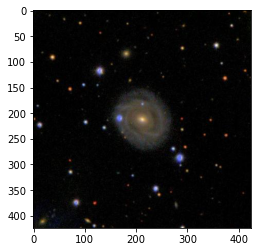

In [18]:
jpg = plt.imread(jpg_path_series[1])
plt.imshow(jpg)

In [148]:
jpg_path_series[1]

'../images_gz2/images/162042.jpg'

In [150]:
df_flagged.iloc[162042]

t01_smooth_or_features_a01_smooth_flag              0
t01_smooth_or_features_a02_features_or_disk_flag    1
t01_smooth_or_features_a03_star_or_artifact_flag    0
t02_edgeon_a04_yes_flag                             0
t02_edgeon_a05_no_flag                              1
t03_bar_a06_bar_flag                                0
t03_bar_a07_no_bar_flag                             0
t04_spiral_a08_spiral_flag                          1
t04_spiral_a09_no_spiral_flag                       0
t05_bulge_prominence_a10_no_bulge_flag              0
t05_bulge_prominence_a11_just_noticeable_flag       0
t05_bulge_prominence_a12_obvious_flag               0
t05_bulge_prominence_a13_dominant_flag              0
t06_odd_a14_yes_flag                                0
t06_odd_a15_no_flag                                 0
t07_rounded_a16_completely_round_flag               0
t07_rounded_a17_in_between_flag                     0
t07_rounded_a18_cigar_shaped_flag                   0
t08_odd_feature_a19_ring_fla

In [154]:
img_id = jpg_path_series[1].split('/',3)[3].split('.')[0]

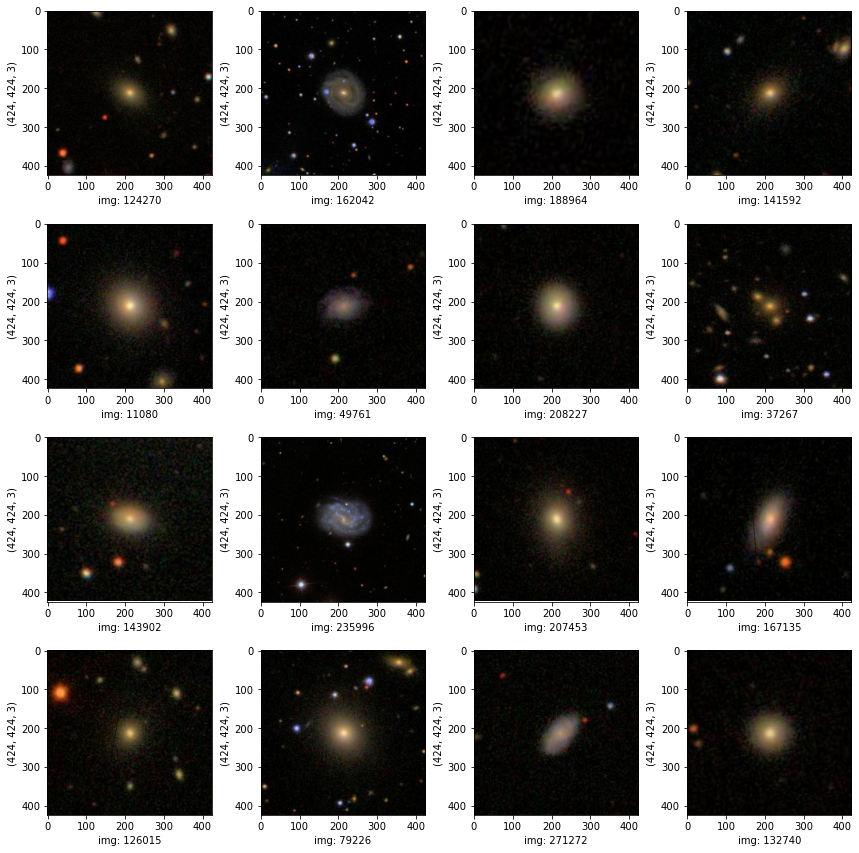

In [19]:
fig, axs = plt.subplots(4,4,figsize=(12,12))
for i, ax in enumerate(axs.flat):
    img = plt.imread(jpg_path_series[i])
    img_id = jpg_path_series[i].split('/',3)[3].split('.')[0]
    ax.imshow(img)
    ax.set_xlabel(f"img: {img_id}")
    ax.set_ylabel(img.shape)
plt.tight_layout()

###  IMG preprocessing

In [61]:
import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE ## tf.data transformation parameters

plt.style.use('ggplot')

In [6]:
from skimage import io, color, filters
from skimage.transform import resize, rotate
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [23]:
from PIL import Image

In [66]:
df_fract.index.values

array([ 58957, 193641,  55934, ..., 282536, 284172, 288961])

In [10]:
df_train, df_test = train_test_split(df_debias, test_size=.2)
df_train.shape, df_test.shape

((191511, 38), (47878, 38))

In [7]:
def process_img(path,shape):
    img = plt.imread(path)
    img = img[106:106*3,106:106*3]
    img = resize(img,shape)
    return img

In [23]:
def get_imgs(df, path, shape=(64,64)):
    ids = df.values[:,0].astype(int).astype(str)
    img_batch=[]
    img_ids=[]
    n=0
    for i in tqdm(ids):
        try:
            img = process_img(path+i+'.jpg',shape)
            img_batch.append(img)
            img_ids.append(i)
        except:
            n+=1
#             print(f'Unable to locate img: {i}  Count: {n}')
          
    print(f'Missing Images: {n}')
    img_batch = np.array(img_batch)
    img_ids = np.array(img_ids).astype(int)
    df_ids = pd.DataFrame({'asset_id':img_ids})
    y_batch = pd.merge(df_ids, df, on='asset_id', how='left')
    return img_batch, y_batch
    

In [83]:
df_debias.shape

(239389, 38)

In [25]:
df_train.shape

(191511, 38)

In [25]:
path = '../images_gz2/images/'
X_train, y_train = get_imgs(df_train[:df_train.shape[0]//128],path)
# X_test, y_test = get_imgs(df_test[:df_test.shape[0]//32],path)

100%|██████████████████████████████████████| 1496/1496 [00:07<00:00, 199.07it/s]

Missing Images: 0


In [26]:
X_train.shape, y_train.shape

((1496, 64, 64, 3), (1496, 38))

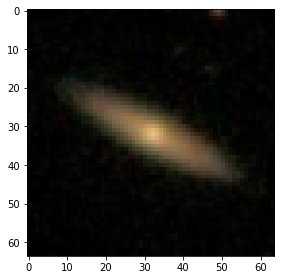

In [32]:
io.imshow(X_train[1493])

In [28]:
y_train

,asset_id,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a03_star_or_artifact_debiased,t02_edgeon_a04_yes_debiased,t02_edgeon_a05_no_debiased,t03_bar_a06_bar_debiased,t03_bar_a07_no_bar_debiased,t04_spiral_a08_spiral_debiased,t04_spiral_a09_no_spiral_debiased,...,t09_bulge_shape_a27_no_bulge_debiased,t10_arms_winding_a28_tight_debiased,t10_arms_winding_a29_medium_debiased,t10_arms_winding_a30_loose_debiased,t11_arms_number_a31_1_debiased,t11_arms_number_a32_2_debiased,t11_arms_number_a33_3_debiased,t11_arms_number_a34_4_debiased,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_debiased
0,30713,0.444,0.909,0.067,0.010105,0.939573,0.000000,1.000000,0.000000,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,225,0.147,0.876,0.023,0.027609,0.932442,0.000000,1.000000,0.726085,4.437999e-02,...,0.892108,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000
2,225215,0.889,0.062,0.026,0.000000,1.000000,0.000000,1.000000,0.993992,1.277312e-06,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000
3,222251,0.500,0.907,0.034,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.800026,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,3900,0.023,0.971,0.002,0.000000,1.000000,0.680750,0.283706,0.964508,2.238112e-03,...,0.000000,0.324843,0.366071,0.209702,0.508608,0.000000,0.0,0.0,0.000000,0.172729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,105928,0.023,1.000,0.026,0.000000,1.000000,0.987409,0.000305,0.997324,1.262625e-04,...,0.000000,0.537248,0.558940,0.000000,0.000000,0.769627,0.0,0.0,0.000000,0.108116
1492,176171,0.600,0.898,0.009,0.000009,0.991777,0.354290,0.539503,0.954635,8.210482e-04,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.190029,0.0,0.0,0.000000,0.501836
1493,660,0.033,0.950,0.000,0.730627,0.351104,0.000000,1.000000,0.998005,1.967207e-11,...,0.594073,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.854014,0.431028
1494,77503,0.640,0.074,0.042,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [105]:
df_debias.loc[df_debias.asset_id.isin(y_train.astype(int))].iloc[:,1:]

,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a03_star_or_artifact_debiased,t02_edgeon_a04_yes_debiased,t02_edgeon_a05_no_debiased,t03_bar_a06_bar_debiased,t03_bar_a07_no_bar_debiased,t04_spiral_a08_spiral_debiased,t04_spiral_a09_no_spiral_debiased,t05_bulge_prominence_a10_no_bulge_debiased,...,t09_bulge_shape_a27_no_bulge_debiased,t10_arms_winding_a28_tight_debiased,t10_arms_winding_a29_medium_debiased,t10_arms_winding_a30_loose_debiased,t11_arms_number_a31_1_debiased,t11_arms_number_a32_2_debiased,t11_arms_number_a33_3_debiased,t11_arms_number_a34_4_debiased,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_debiased
0,0.000,0.988,0.012,0.047681,0.953848,0.025000,0.975305,1.000000,0.000000,0.050,...,0.00,0.676487,0.301320,0.02500,0.000000,0.075071,0.024617,0.049583,0.482646,0.394506
3,0.036,0.964,0.000,0.036974,0.963112,0.038000,0.962028,0.962366,0.038012,0.077,...,1.00,0.640306,0.319844,0.04000,0.000000,0.079018,0.240087,0.200076,0.241322,0.239765
6,0.649,0.286,0.065,0.265277,0.730913,0.257785,0.750579,0.000000,1.000000,0.000,...,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.194,0.777,0.029,0.000000,1.000000,0.000000,1.000000,0.675014,0.343496,0.000,...,0.00,0.478099,0.427626,0.09505,0.140308,0.230738,0.098192,0.049575,0.049229,0.426677
17,0.337,0.662,0.000,0.000000,1.000000,0.062000,0.938115,0.939868,0.062027,0.000,...,0.00,0.800674,0.199974,0.00000,0.066239,0.129655,0.000000,0.000000,0.000000,0.798824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239355,0.889,0.044,0.067,0.500000,0.500000,0.000000,1.000000,0.000000,1.000000,1.000,...,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
239358,0.827,0.123,0.050,0.800000,0.200000,0.000000,1.000000,0.000000,1.000000,0.000,...,0.75,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
239359,0.928,0.048,0.024,0.000000,1.000000,0.000000,1.000000,0.500000,0.500000,1.000,...,0.00,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
239363,0.881,0.071,0.048,0.000000,1.000000,0.333000,0.667000,0.000000,1.000000,1.000,...,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:
df_debias.loc[df_debias.asset_id==y_train[7].astype(int)]

,asset_id,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a03_star_or_artifact_debiased,t02_edgeon_a04_yes_debiased,t02_edgeon_a05_no_debiased,t03_bar_a06_bar_debiased,t03_bar_a07_no_bar_debiased,t04_spiral_a08_spiral_debiased,t04_spiral_a09_no_spiral_debiased,...,t09_bulge_shape_a27_no_bulge_debiased,t10_arms_winding_a28_tight_debiased,t10_arms_winding_a29_medium_debiased,t10_arms_winding_a30_loose_debiased,t11_arms_number_a31_1_debiased,t11_arms_number_a32_2_debiased,t11_arms_number_a33_3_debiased,t11_arms_number_a34_4_debiased,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_debiased
20861,166912,0.0,1.0,0.0,0.000079,0.988823,0.344801,0.545172,0.997418,0.026007,...,0.0,0.270575,0.529118,0.136844,0.0,0.183764,0.459829,0.047334,0.083368,0.21306


In [64]:
y_train[9].astype(int)

8153

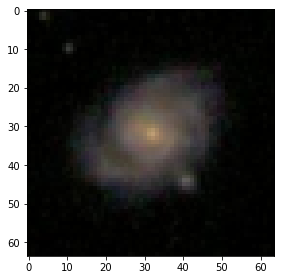

In [66]:
io.imshow(X_train[7])

12288

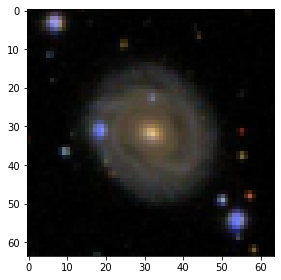

In [17]:
img = io.imread(jpg_path_series[1])
img = img[106:106*3,106:106*3]
img = resize(img,(64,64))
io.imshow(img)
img.size

0.0

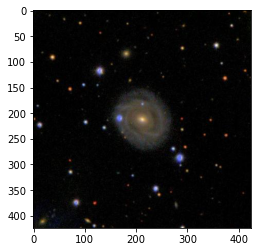

134832

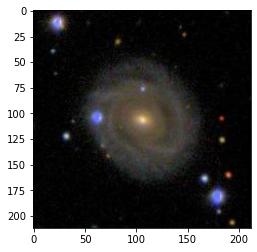

In [59]:
img = plt.imread(jpg_path_series[1])
plt.imshow(img)
plt.show()
img = img.T[:,106:106*3,106:106*3] #crop from 424x424 to 212x212
plt.imshow(img.T)
img.size

In [31]:
img.T.size

134832

In [163]:
def process_img(paths):
    '''
    crop and resize images
    '''
    arr = np.zeros(shape=(len(paths),3,106,106))
    for i, path in enumerate(paths):
        img = plt.imread(path)
        img = img.T[:,106:106*3,106:106*3] #crop from 424x424 to 212x212
        img = imresize(img,size=(106,106,3),method='cubic').T #resize to half
        arr[i]=img
    return arr

##  Keras Model

In [68]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K

In [78]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [79]:
def conv(shape):
    model = Sequential()
    model.add(Conv2D(512, (3, 3), input_shape=shape))
    model.add(Conv2D(256, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(GlobalMaxPooling2D())


    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(37))
    model.add(Activation('sigmoid'))
    return model

In [80]:
model = conv((64,64,3))
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=[root_mean_squared_error])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 512)       14336     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 60, 60, 256)       1179904   
_________________________________________________________________
activation_28 (Activation)   (None, 60, 60, 256)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 256)       590080    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 26, 26, 128)       295040    
_________________________________________________________________
activation_29 (Activation)   (None, 26, 26, 128)      

In [87]:
df_test.shape

(47878, 38)

In [88]:
X_test, y_test = get_imgs(df_test[:df_test.shape[0]//4],path)

100%|████████████████████████████████████| 11969/11969 [01:00<00:00, 199.21it/s]


Missing Images: 6


In [89]:
X_train.shape, y_train.shape

((47858, 64, 64, 3), (47858,))

In [90]:
X_test.shape, y_test.shape

((11963, 64, 64, 3), (11963,))

NameError: name 'y_test' is not defined

In [91]:
batch_size = 32
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


2021-07-13 13:09:06.889582: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 2352316416 exceeds 10% of free system memory.


ValueError: in user code:

    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:748 train_step
        loss = self.compiled_loss(
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1605 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4823 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/tim/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 37) vs (None, 1))
